In [28]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

import os
from collections import defaultdict

In [29]:
def set_paramters (filepath):
    with open(filepath) as file:
        for line in file:
            if line.startswith("#m="):
                global m
                m = float(line.strip()[3:])
            elif line.startswith("#A="):
                global a
                a = int(line.strip()[3:])
            elif line.startswith("#H="):
                global h
                h = int(line.strip()[3:])
            elif line.startswith("#NH="):
                global nh
                nh = float(line.strip()[4:])
            elif line.startswith("#rH2="):
                global rh2
                rh_sqr = float(line.strip()[5:])
            elif line.startswith("#Rp2="):
                global rp2
                rp_sqr = float(line.strip()[5:])
            elif line.startswith("#RC2="):
                global rc2
                rc2 = float(line.strip()[5:])
            else:
                break


def set_parameters_manually (m_, a_, h_, nh_, rh_sqr_, rp_sqr_, rc_sqr_):
    global m
    m = m_
    
    global a
    a = a_
    
    global h
    h = h_

    global nh
    nh = nh_

    global rh2
    rh2 = rh_sqr_

    global rp2
    rp2 = rp_sqr_

    global rc2
    rc2 = rc_sqr_


def files_with_same_parameters(directory):
    matching_files = list()
    for filename in os.listdir(directory):
        with open(directory+filename, 'r') as file:
            for line in file:
                if line.startswith("#m="):
                    if (m != float(line.strip()[3:])):
                        break
                elif line.startswith("#A="):
                    if (a != int(line.strip()[3:])):
                        break
                elif line.startswith("#H="):
                    if (h != int(line.strip()[3:])):
                        break
                elif line.startswith("#NH="):
                    if (nh != float(line.strip()[4:])):
                        break
                elif line.startswith("#rH2="):
                    if (rh2 != float(line.strip()[5:])):
                        break
                elif line.startswith("#Rp2="):
                    if (rp2 != float(line.strip()[5:])):
                        break
                elif line.startswith("#RC2="):
                    if (rc2 != float(line.strip()[5:])):
                        break
                elif line.startswith("##"):
                    matching_files.append(filename)
                    break
    return matching_files

Reading from 8 files
0.05 0.3162278
Ne=8


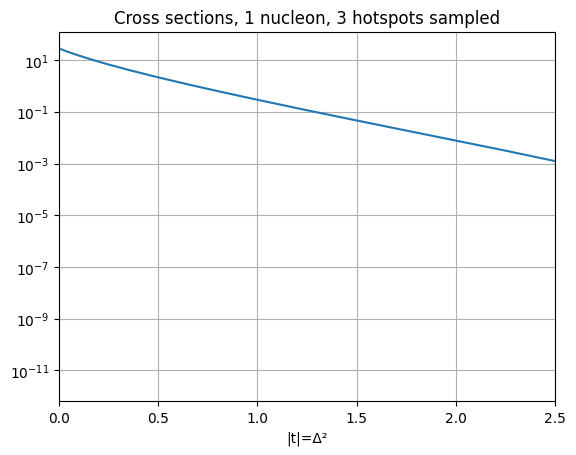

In [30]:
# Define the directory where your files are located
dense_or_dilute = 'dilute/'
directory = '../Data/raw/' + dense_or_dilute

#set_paramters("../Data/3651184495_Amplitude.dat")
set_parameters_manually(0.22, 1, 3, 3.0, 0.7, 3.3, 2.9)
file_list = files_with_same_parameters(directory)
print(f"Reading from {len(file_list)} files")

delta_all = []
q_all = []
a_co_real_all = []
a_co_imag_all = []
a2_inco_all = []

# Loop through each file in the directory
for filename in file_list:
    delta_array = []
    q_array = []
    a_co_real_array = []
    a_co_imag_array = []
    a2_inco_array = []

    if filename.endswith("_Amplitude.dat"):
        with open(directory + filename, 'r') as file:
            # Read data from the file and store it in the dictionary
            for line in file:
                if (line == "\n"):
                    continue
                if (line.startswith("#") == True):  # Skip lines starting with #
                    continue
                else:
                    delta, q, a_co_real, a_co_imag, a2_inco = map(float, line.strip().split(" "))

                    delta_array.append(delta)
                    q_array.append(q)
                    a_co_real_array.append(a_co_real)
                    a_co_imag_array.append(a_co_imag)
                    a2_inco_array.append(a2_inco)
    
    delta_all.append(delta_array)
    q_all.append(q_array)
    a_co_real_all.append(a_co_real_array)
    a_co_imag_all.append(a_co_imag_array)
    a2_inco_all.append(a2_inco_array)


# the _all arrays contain N_e arrays (where N_e is the number of different runs) and the inner arrays contain the results for different delta and Q of the same run

# finding different values of Q
global q1
q1 = -1.0
global q2
q2 = -2.0

for q in q_all[0]:
    if (q1 == -1.0):
        q1 = q
    if (q1 != -1.0 and q != q1):
        q2 = q
    if (q != -1.0 and q2 != -2.0):
        break

print(q1, q2)


t_results = []

a_co_real_results_Q1 = []
a_co_real_err_results_Q1 = []

a_co_imag_results_Q1 = []
a_co_imag_err_results_Q1 = []

a2_inco_results_Q1 = []
a2_inco_err_results_Q1 = []

a_co_real_results_Q2 = []
a_co_real_err_results_Q2 = []

a_co_imag_results_Q2 = []
a_co_imag_err_results_Q2 = []

a2_inco_results_Q2 = []
a2_inco_err_results_Q2 = []

Ne = len(delta_all)
print(f"Ne={Ne}")

for i in range(len(delta_all[0])): # iterating through the different values of delta
    a_co_real_avg = 0.0
    a_co_imag_avg = 0.0
    a2_inco_avg = 0.0

    a_co_real_stddev = 0.0
    a_co_imag_stddev = 0.0
    a2_inco_stddev = 0.0
    for run in range(Ne):
        a_co_real_avg += a_co_real_all[run][i]/float(Ne)
        a_co_imag_avg += a_co_imag_all[run][i]/float(Ne)
        a2_inco_avg += a2_inco_all[run][i]/float(Ne)

    for run in range(Ne):
        a_co_real_stddev += np.square( a_co_real_all[run][i]-a_co_real_avg )
        a_co_imag_stddev += np.square( a_co_imag_all[run][i]-a_co_imag_avg )
        a2_inco_stddev += np.square( a2_inco_all[run][i]-a2_inco_avg )

    a_co_real_stddev = np.sqrt( a_co_real_stddev/float(Ne) )
    a_co_imag_stddev = np.sqrt( a_co_imag_stddev/float(Ne) )
    a2_inco_stddev = np.sqrt( a2_inco_stddev/float(Ne) )

    if (q_all[0][i] == q1):
        t_results.append(delta_all[0][i]*delta_all[0][i])

        a_co_real_results_Q1.append(a_co_real_avg*a_co_real_avg)
        a_co_real_err_results_Q1.append( np.abs(2.0*a_co_real_avg*a_co_real_stddev) )

        a_co_imag_results_Q1.append(a_co_imag_avg*a_co_imag_avg)
        a_co_imag_err_results_Q1.append( np.abs(2.0*a_co_imag_avg*a_co_imag_stddev) )

        a2_inco_results_Q1.append(a2_inco_avg)
        a2_inco_err_results_Q1.append(a2_inco_stddev)

    else: # if q == q2
        a_co_real_results_Q2.append(a_co_real_avg*a_co_real_avg)
        a_co_real_err_results_Q2.append( np.abs(2.0*a_co_real_avg*a_co_real_stddev) )
        
        a_co_imag_results_Q2.append(a_co_imag_avg*a_co_imag_avg)
        a_co_imag_err_results_Q2.append( np.abs(2.0*a_co_imag_avg*a_co_imag_stddev) )
        
        a2_inco_results_Q2.append(a2_inco_avg)
        a2_inco_err_results_Q2.append(a2_inco_stddev)

cs_results = []
cs_results_Q1 = []
cs_results_Q2 = []

cs_results_Q1.append(t_results)

cs_results_Q1.append(a_co_real_results_Q1)
cs_results_Q1.append(a_co_real_err_results_Q1)

cs_results_Q1.append(a_co_imag_results_Q1)
cs_results_Q1.append(a_co_imag_err_results_Q1)

cs_results_Q1.append(a2_inco_results_Q1)
cs_results_Q1.append(a2_inco_err_results_Q1)


cs_results_Q2.append(t_results)

cs_results_Q2.append(a_co_real_results_Q2)
cs_results_Q2.append(a_co_real_err_results_Q2)

cs_results_Q2.append(a_co_imag_results_Q2)
cs_results_Q2.append(a_co_imag_err_results_Q2)

cs_results_Q2.append(a2_inco_results_Q2)
cs_results_Q2.append(a2_inco_err_results_Q2)

cs_results.append(cs_results_Q1)
cs_results.append(cs_results_Q2)

#for i in range(len(cs_results[0][0])):
#    print(cs_results[0][0][i], cs_results[0][1][i], cs_results[0][2][i], cs_results[0][3][i])

plt.title("Cross sections, 1 nucleon, 3 hotspots sampled")
plt.yscale('log')
plt.xlabel('|t|=Δ²')
plt.grid()
plt.xlim(0, 2.5)
plt.errorbar(cs_results[0][0], cs_results[0][3])
#plt.semilogy(cs_results[0][0], cs_results[0][3])
plt.show()

out_file = '../Data/dsigmadt_BG_29_m_022_A_1_H_3.dat'
with open(out_file, 'w') as file:
    file.write(f"#m={m}\n"
                f"#A={a}\n"
                f"#NH={nh}\n"
                f"#rH2={rh2}\n"
                f"#Rp2={rp2}\n"
                f"#RC2={rc2}\n")
    for i in range( len(cs_results[0][0]) ):
        file.write(f"{cs_results[0][0][i]} {cs_results[0][1][i]} {cs_results[0][2][i]} {cs_results[0][3][i]} {cs_results[0][4][i]} {cs_results[0][5][i]} {cs_results[0][6][i]}\n") # Q1 results
    #file.write("\n\n")
    #for i in range( len(cs_results[1][0]) ):
    #    file.write(f"{cs_results[1][0][i]} {cs_results[1][1][i]} {cs_results[1][2][i]} {cs_results[1][3][i]} {cs_results[1][4][i]} {cs_results[1][5][i]} {cs_results[1][6][i]}\n") # Q2 results

# Write the average data to a new file
#output_file = '/path/to/your/output/average.txt'
#with open(output_file, 'w') as file:
#    for t, average_value in average_dict.items():
#        file.write(f"{t}, {average_value}\n")
#print(f"Average data saved to {output_file}")